In [1]:
import sys
sys.path.append('../')
sys.path.append('../../')

from Datasets.BaseballDataset import BaseballDataset
from BaselineModel.BaselineModel import BaselineModel
from TransformerModel.TransformerModel import *

import torch
import torch.nn as nn
import torch.optim as optim
import math
import torch.nn.functional as F
from torch.utils.data import DataLoader
import json
import pandas as pd
import os
import matplotlib.pyplot as plt
import numpy as np
import pickle
from sklearn.preprocessing import StandardScaler

In [2]:
data_config_path = "../../data/config.json"
train_data_path = "../../data/mini_train.csv"
test_data_path = "../../data/mini_test.csv"
scalers_path = "../../data/statcast_2023-2024_cleaned_scalers.pkl"
sequence_length = 200
train_data = pd.read_csv(train_data_path)
test_data = pd.read_csv(test_data_path)

In [3]:
train_dataset = BaseballDataset(train_data,data_config_path,sequence_length)
test_dataset = BaseballDataset(test_data,data_config_path,sequence_length)

In [4]:
m_path = "../tiny_data_grid_experiment/h8_e8_h72_d0.1_lp0.5_lr0.001_ep50/transformer_model.pth"
c_path = "../tiny_data_grid_experiment/h8_e8_h72_d0.1_lp0.5_lr0.001_ep50/model_config.json"

baseline_model = BaselineModel(train_dataset, scalers_path)
transformer_model = TransformerHelper(m_path,c_path)

c:\Users\declan\anaconda3\envs\pytorchCUDA\lib\site-packages\sklearn\base.py:347: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.5.1 when using version 1.3.0. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(


In [5]:
baseline_model.train()

In [6]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(device)

trans_preds, true = transformer_model.make_preds(test_dataset, scalers_path, device, 200, scale=False)

cuda


In [7]:
loader = DataLoader(test_dataset, batch_size=200, shuffle=False, num_workers=0)

base_preds = []
for seq, _, _ in loader:

    base_preds.append(baseline_model.predict(seq))

baseline_preds = pd.concat(base_preds, ignore_index=True)

In [8]:
trans_preds

,launch_speed,hc_x,hc_y,launch_angle,events_B,events_S,events_double,events_field_out,events_hit_by_pitch,events_home_run,...,hit_location_0.0,hit_location_1.0,hit_location_2.0,hit_location_3.0,hit_location_4.0,hit_location_5.0,hit_location_6.0,hit_location_7.0,hit_location_8.0,hit_location_9.0
0,-0.420027,-0.387474,-0.235872,-0.437261,0.000028,0.000480,0.004020,0.035451,2.255846e-03,0.002723,...,0.007528,0.002794,0.934556,0.008274,0.004074,0.005590,0.008756,0.012655,0.001800,0.013973
1,0.572416,-0.533159,-0.432873,0.743756,0.000418,0.999301,0.000016,0.000167,5.122162e-07,0.000030,...,0.998983,0.000023,0.000008,0.000061,0.000065,0.000062,0.000060,0.000147,0.000500,0.000093
2,-0.087212,-0.510940,-0.442106,-0.041088,0.000966,0.998726,0.000012,0.000206,4.237845e-07,0.000029,...,0.999195,0.000012,0.000002,0.000055,0.000048,0.000062,0.000059,0.000092,0.000363,0.000111
3,-0.631429,-0.371215,-0.409830,-0.579614,0.997635,0.001696,0.000005,0.000031,4.922133e-04,0.000006,...,0.999797,0.000006,0.000037,0.000023,0.000008,0.000016,0.000021,0.000006,0.000047,0.000039
4,1.856488,2.078854,1.832109,1.596143,0.003003,0.010102,0.088570,0.517361,2.268324e-04,0.099918,...,0.107795,0.029062,0.007531,0.072493,0.097503,0.098498,0.127195,0.116123,0.165357,0.178443
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,0.103505,-0.514663,-0.474250,0.238023,0.000646,0.998876,0.000021,0.000309,8.175101e-07,0.000049,...,0.998574,0.000025,0.000005,0.000098,0.000088,0.000097,0.000101,0.000186,0.000648,0.000177
414,-0.180311,-0.322329,-0.385461,-0.104099,0.004813,0.989208,0.000233,0.004002,8.901548e-06,0.000598,...,0.991369,0.000220,0.000021,0.000704,0.000685,0.000694,0.000671,0.000871,0.003088,0.001677
415,-0.571334,-0.524588,-0.365842,-0.606723,0.000120,0.000889,0.002418,0.018576,1.601592e-02,0.001507,...,0.010761,0.001065,0.956420,0.006358,0.002130,0.002712,0.006667,0.004056,0.001423,0.008407
416,0.019744,-0.480585,-0.461382,0.078979,0.000936,0.998338,0.000030,0.000460,1.497296e-06,0.000076,...,0.998061,0.000034,0.000008,0.000140,0.000118,0.000145,0.000143,0.000235,0.000856,0.000260


In [9]:
baseline_preds

,launch_speed,hc_x,hc_y,launch_angle,events_B,events_S,events_double,events_field_out,events_hit_by_pitch,events_home_run,...,hit_location_0.0,hit_location_1.0,hit_location_2.0,hit_location_3.0,hit_location_4.0,hit_location_5.0,hit_location_6.0,hit_location_7.0,hit_location_8.0,hit_location_9.0
0,-3.468788,-1.814065,-2.158083,-3.910382,0.423023,0.182278,0.030216,0.045265,0.000543,0.005615,...,0.631952,0.001549,0.226028,0.028410,0.008734,0.005126,0.016048,0.069479,0.004885,0.007789
1,-3.237545,-1.501004,-1.955206,-3.611888,0.311388,0.445216,0.016493,0.135831,0.000529,0.013454,...,0.795982,0.000719,0.001621,0.019836,0.021864,0.006571,0.025686,0.047480,0.030894,0.049347
2,-3.721796,-1.938331,-2.323415,-4.148171,0.303481,0.548203,0.030149,0.046463,0.000767,0.009434,...,0.885957,0.000745,0.001734,0.028015,0.009573,0.005909,0.009052,0.044265,0.007458,0.007292
3,-3.864525,-1.729666,-2.153689,-4.346768,0.416569,0.437195,0.018652,0.076476,0.001250,0.002765,...,0.871703,0.004537,0.001078,0.018850,0.015143,0.010070,0.012900,0.010502,0.021947,0.033269
4,-3.563540,-1.703782,-2.158981,-3.797437,0.256879,0.600327,0.012614,0.092685,0.000144,0.007680,...,0.862533,0.003241,0.001087,0.008057,0.006742,0.018154,0.008961,0.017338,0.031599,0.042287
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,-4.051504,-2.253417,-2.710900,-4.453652,0.463957,0.482266,0.001263,0.030149,0.009039,0.004447,...,0.975909,0.000566,0.000252,0.000393,0.003879,0.003954,0.004755,0.004479,0.003794,0.002019
414,-4.072811,-1.933243,-2.333801,-4.398078,0.363045,0.525810,0.000715,0.084169,0.004832,0.006513,...,0.920431,0.002511,0.001612,0.002463,0.013146,0.014538,0.014428,0.006697,0.017208,0.006966
415,-3.749907,-2.067573,-2.517982,-4.164611,0.548877,0.313334,0.002056,0.043661,0.002860,0.006226,...,0.904520,0.001571,0.039898,0.000741,0.005938,0.019759,0.004614,0.015156,0.004751,0.003051
416,-4.381138,-2.398974,-2.895715,-4.875800,0.625235,0.342268,0.000752,0.017157,0.001775,0.004336,...,0.982182,0.000270,0.000252,0.000318,0.002768,0.005237,0.001504,0.003376,0.002457,0.001634


In [10]:
true

,launch_speed,hc_x,hc_y,launch_angle,events_B,events_S,events_double,events_field_out,events_hit_by_pitch,events_home_run,...,hit_location_0.0,hit_location_1.0,hit_location_2.0,hit_location_3.0,hit_location_4.0,hit_location_5.0,hit_location_6.0,hit_location_7.0,hit_location_8.0,hit_location_9.0
0,1.138537,2.335785,2.482888,1.462903,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,-0.615725,-0.430264,-0.425846,-0.596369,0.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,-0.615725,-0.430264,-0.425846,-0.596369,0.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,-0.615725,-0.430264,-0.425846,-0.596369,1.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1.971421,1.541395,0.839093,1.878718,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,-0.615725,-0.430264,-0.425846,-0.596369,0.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
414,-0.615725,-0.430264,-0.425846,-0.596369,0.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
415,-0.615725,-0.430264,-0.425846,-0.596369,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
416,-0.615725,-0.430264,-0.425846,-0.596369,0.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [11]:
from sklearn.metrics import mean_squared_error, log_loss, f1_score, confusion_matrix

# Continuous features: first 4 values
continuous_true = true.iloc[:, :4].values
continuous_trans = trans_preds.iloc[:, :4].values
continuous_base = baseline_preds.iloc[:, :4].values

# Categorical probabilities: next 20 values (10 + 10)
categorical_true = true.iloc[:, 4:].values
categorical_trans = trans_preds.iloc[:, 4:].values
categorical_base = baseline_preds.iloc[:, 4:].values


In [12]:
mse_trans = mean_squared_error(continuous_true, continuous_trans)
mse_base = mean_squared_error(continuous_true, continuous_base)


In [13]:
# Split categorical probabilities
categorical_probs_true_1 = categorical_true[:, :10]  # First categorical feature
categorical_probs_true_2 = categorical_true[:, 10:]  # Second categorical feature

categorical_probs_trans_1 = categorical_trans[:, :10]  # Model 1
categorical_probs_trans_2 = categorical_trans[:, 10:]  # Model 1

categorical_probs_base_1 = categorical_base[:, :10]  # Model 2
categorical_probs_base_2 = categorical_base[:, 10:]  # Model 2

# Cross-entropy loss
cross_entropy_loss_trans_1 = log_loss(categorical_probs_true_1, categorical_probs_trans_1)
cross_entropy_loss_trans_2 = log_loss(categorical_probs_true_2, categorical_probs_trans_2)

cross_entropy_loss_base_1 = log_loss(categorical_probs_true_1, categorical_probs_base_1)
cross_entropy_loss_base_2 = log_loss(categorical_probs_true_2, categorical_probs_base_2)


In [14]:
# Convert probabilities to predicted labels (assuming 10 classes)
labels_trans_1 = np.argmax(categorical_probs_trans_1, axis=1)
labels_trans_2 = np.argmax(categorical_probs_trans_2, axis=1)

labels_base_1 = np.argmax(categorical_probs_base_1, axis=1)
labels_base_2 = np.argmax(categorical_probs_base_2, axis=1)

labels_true_1 = np.argmax(categorical_probs_true_1, axis=1)
labels_true_2 = np.argmax(categorical_probs_true_2, axis=1)

# Compute F1 score
f1_trans_1 = f1_score(labels_true_1, labels_trans_1, average='weighted')
f1_trans_2 = f1_score(labels_true_2, labels_trans_2, average='weighted')

f1_base_1 = f1_score(labels_true_1, labels_base_1, average='weighted')
f1_base_2 = f1_score(labels_true_2, labels_base_2, average='weighted')

# Compute confusion matrix
conf_matrix_trans_1 = confusion_matrix(labels_true_1, labels_trans_1)
conf_matrix_trans_2 = confusion_matrix(labels_true_2, labels_trans_2)

conf_matrix_base_1 = confusion_matrix(labels_true_1, labels_base_1)
conf_matrix_base_2 = confusion_matrix(labels_true_2, labels_base_2)


In [15]:
results = {
    'Model': ['Model 1', 'Model 2'],
    'MSE': [mse_trans, mse_base],
    'Cross-Entropy Loss Cat 1': [cross_entropy_loss_trans_1 + cross_entropy_loss_trans_2, cross_entropy_loss_base_1 + cross_entropy_loss_base_2],
    'F1 Score Cat 1': [f1_trans_1, f1_base_1],
    'F1 Score Cat 2': [f1_trans_2, f1_base_2],
    'Confusion Matrix Cat 1': [conf_matrix_trans_1.tolist(), conf_matrix_base_1.tolist()],
    'Confusion Matrix Cat 2': [conf_matrix_trans_2.tolist(), conf_matrix_base_2.tolist()]
}

results_df = pd.DataFrame(results)


In [16]:
results_df

,Model,MSE,Cross-Entropy Loss Cat 1,F1 Score Cat 1,F1 Score Cat 2,Confusion Matrix Cat 1,Confusion Matrix Cat 2
0,Model 1,0.492889,0.772364,0.889038,0.835998,"[[151, 3, 0, 0, 0, 0, 0, 0], [0, 166, 0, 0, 0,...","[[332, 0, 4, 0, 0, 0, 1, 1, 0, 1], [0, 0, 0, 0..."
1,Model 2,11.130173,2.109095,0.412432,0.726369,"[[70, 82, 0, 0, 0, 0, 2, 0], [39, 120, 0, 0, 0...","[[339, 0, 0, 0, 0, 0, 0, 0, 0, 0], [1, 0, 0, 0..."


Confusion Matrix for Model 1 - Categorical Feature 1


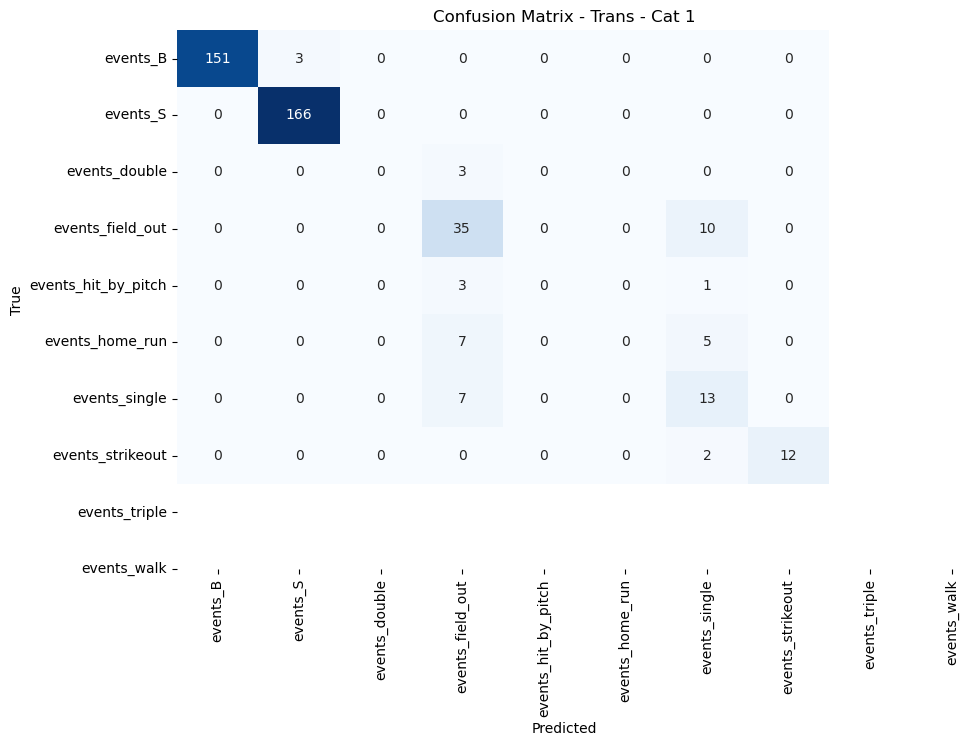

Confusion Matrix for Model 1 - Categorical Feature 2


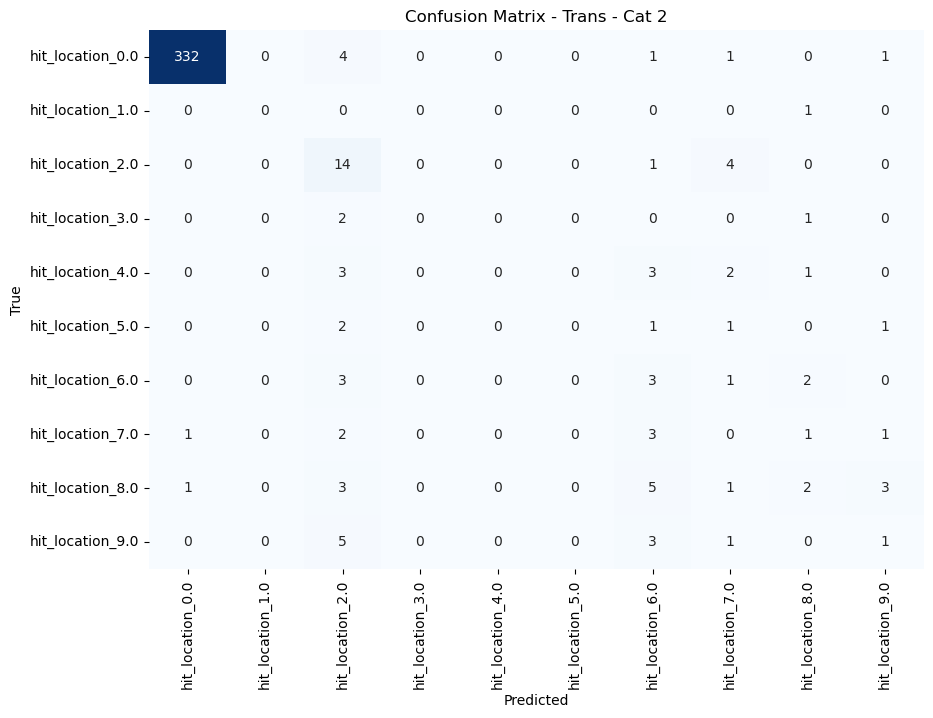

Confusion Matrix for Model 2 - Categorical Feature 1


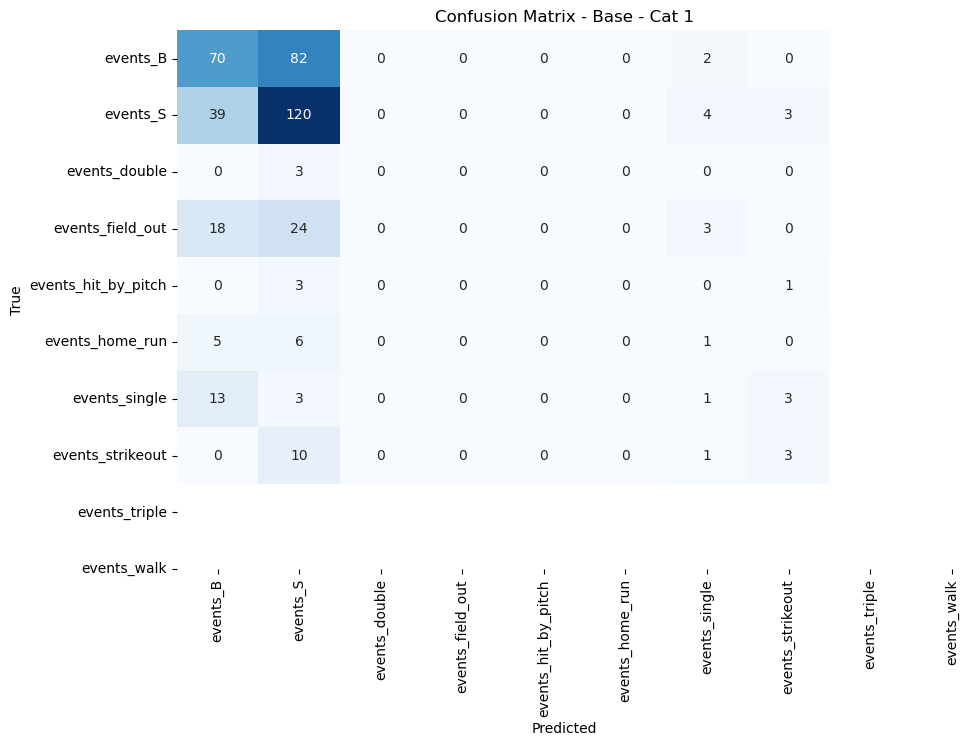

Confusion Matrix for Model 2 - Categorical Feature 2


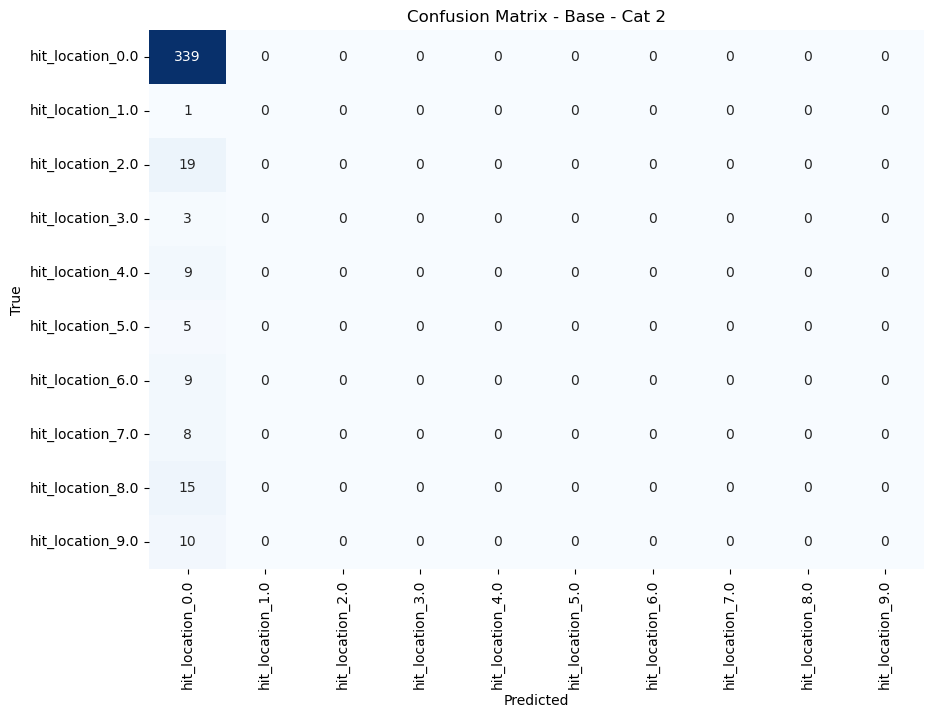

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming class names for each categorical feature are in columns
class_names_cat1 = true.columns[4:14]  # Class names for the first categorical feature
class_names_cat2 = true.columns[14:24]  # Class names for the second categorical feature



def plot_confusion_matrix(cm, class_names, title='Confusion Matrix'):
    plt.figure(figsize=(10, 7))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
                xticklabels=class_names, yticklabels=class_names)
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.title(title)
    plt.show()


# Plot confusion matrices for Model 1
print("Confusion Matrix for Model 1 - Categorical Feature 1")
plot_confusion_matrix(conf_matrix_trans_1, class_names_cat1, 'Confusion Matrix - Trans - Cat 1')

print("Confusion Matrix for Model 1 - Categorical Feature 2")
plot_confusion_matrix(conf_matrix_trans_2, class_names_cat2, 'Confusion Matrix - Trans - Cat 2')

# Plot confusion matrices for Model 2
print("Confusion Matrix for Model 2 - Categorical Feature 1")
plot_confusion_matrix(conf_matrix_base_1, class_names_cat1, 'Confusion Matrix - Base - Cat 1')

print("Confusion Matrix for Model 2 - Categorical Feature 2")
plot_confusion_matrix(conf_matrix_base_2, class_names_cat2, 'Confusion Matrix - Base - Cat 2')



